In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml # enables us to get dataset form openml
import os


data_dir = '../data'  # folder for data, in main project folder
file_path = os.path.join(data_dir, 'bodyfat.csv') # patch to csv file

# if data folder doesnt exist, create one
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# downloading dataset form openml
print("Downloading dataset from OpenML...")
dataset = fetch_openml(data_id=560, as_frame=True, parser='auto')
df = dataset.frame

# saving data af csv file in data directiory
df.to_csv(file_path, index=False)

print(f"Success! Data saved to: {file_path}")
print(f"Dataset preview:")
df.head()

Success! Data saved to: ../data/bodyfat.csv
Dataset preview:


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [3]:
# basic information about the data, needed before starting next tasks
print("--- Data Info ---")
df.info()

# statistical informations like mean, min, max, etc.
print("\n--- Statistical Summary ---")
df.describe()



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  class    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB

--- Statistical Summary ---


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [4]:
#we have 0 bf as min, whitch is imposible so need check that 
# Look for rows where Bodyfat is 0
zero_fat = df[df['class'] == 0]
print(zero_fat)   

     Density  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  Knee  \
181   1.1089   40   118.5    68.0  33.8   79.3     69.4  85.0   47.2  33.5   

     Ankle  Biceps  Forearm  Wrist  class  
181   20.2    27.7     24.6   16.5    0.0  


In [5]:
#deleting bf=0 record and converting weight and height to the Metric system

# copy of the dataframe to keep the original safe
df_metric = df.copy()

# remove the row where bodyfat is 0 
df_metric = df_metric[df_metric['class'] > 0]

# converting weight from pounds to kilograms
# 1 pound = 0.453592 kg
df_metric['Weight'] = df_metric['Weight'] * 0.453592

# converting height from inches to centimeters
# 1 inch = 2.54 cm
df_metric['Height'] = df_metric['Height'] * 2.54

# check the result
print("New units: Weight (kg), Height (cm)")
print(df_metric[['Weight', 'Height', 'class']].head())

# statistical informations like mean, min, max, etc.
print("\n--- Statistical Summary ---")
df_metric.describe()



New units: Weight (kg), Height (cm)
      Weight   Height  class
0  69.966566  172.085   12.3
1  78.584814  183.515    6.1
2  69.853168  168.275   25.3
3  83.801122  183.515   10.4
4  83.574326  180.975   28.7

--- Statistical Summary ---


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,1.055361,44.904382,81.267874,178.199721,38.008765,100.909960,92.648207,99.964143,59.454582,38.610757,23.113944,32.291633,28.680080,18.236653,19.227092
std,0.018768,12.623423,13.243915,9.315824,2.421240,8.336466,10.704509,7.115959,5.203261,2.394996,1.688290,3.013405,2.008283,0.929005,8.297174
min,0.995000,22.000000,56.699000,74.930000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,24.800000,21.000000,15.800000,0.700000
25%,1.041400,35.500000,72.234526,173.355000,36.400000,94.500000,84.900000,95.550000,56.050000,37.050000,22.000000,30.250000,27.300000,17.600000,12.500000
50%,1.054900,43.000000,80.172386,177.800000,38.000000,99.700000,91.000000,99.300000,59.000000,38.500000,22.800000,32.100000,28.700000,18.300000,19.200000
75%,1.070350,54.000000,89.357624,183.515000,39.450000,105.450000,99.450000,103.550000,62.400000,39.950000,24.000000,34.350000,30.000000,18.800000,25.300000
max,1.099100,81.000000,164.721935,197.485000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [6]:
#removing people shorter than 120cm whitch is almost impostible
# 
df_final = df_metric[df_metric['Height'] > 120].copy()

# dropping the 'Density' column, because it is bodyfat but in diffrent form
if 'Density' in df_final.columns:
    df_final = df_final.drop(columns=['Density'])

# saving this clean, metric version to our data folder
processed_path = '../data/bodyfat_processed.csv'
df_final.to_csv(processed_path, index=False)

print(f"Final dataset saved! Rows remaining: {len(df_final)}")
print(f"Data saved to: {processed_path}")

Final dataset saved! Rows remaining: 250
Data saved to: ../data/bodyfat_processed.csv


In [7]:
# counting missing values in each column
print(df_final.isnull().sum())

Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
class      0
dtype: int64


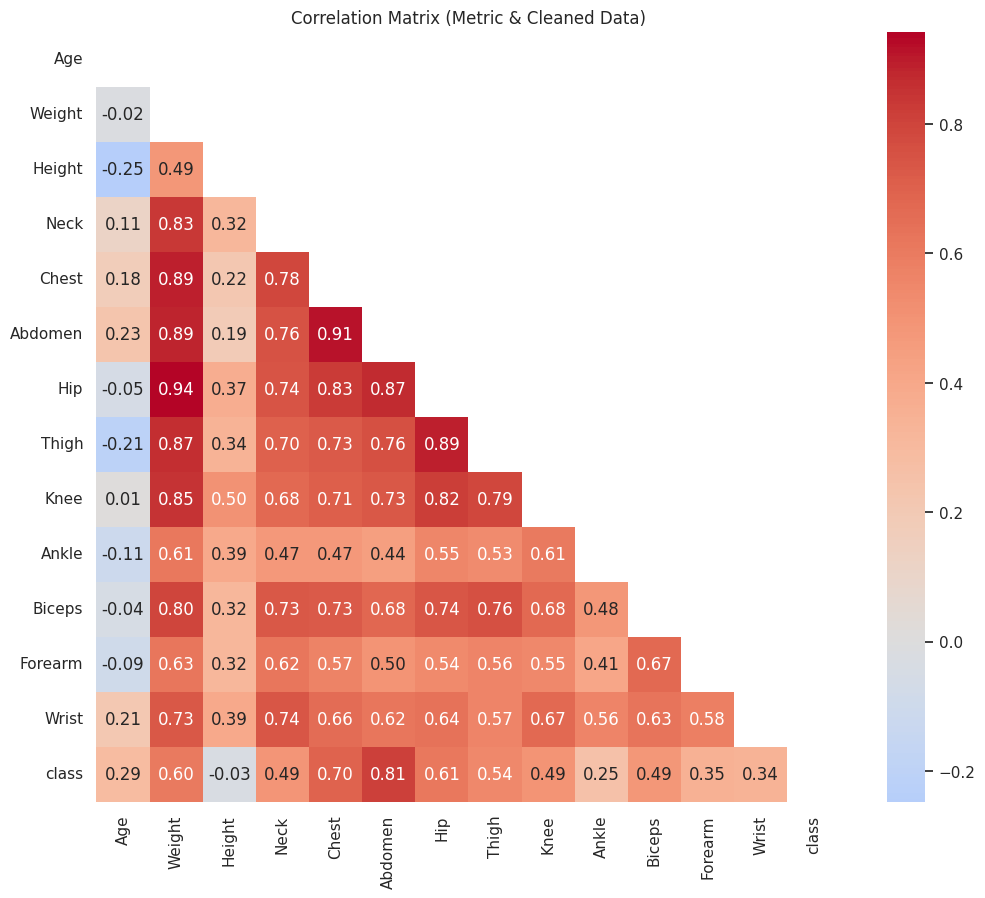

In [8]:
#correaltion matrix 
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="white")

# working on cleaned dataframe
corr_matrix = df_final.corr()

# mask to hide the top triangle 
# because the top and bottom triangles are the same
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot, only lower triangle,with the annotations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix (Metric & Cleaned Data)")
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# dataframe without our predictable variable
X = df_final.drop(columns=['class'])


X_vif = X.copy()


vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) #counting vif for each column
                          for i in range(len(X_vif.columns))]

# sorting vif from biggest to smallest
print(vif_data.sort_values(by="VIF", ascending=False))

    feature          VIF
6       Hip  2099.945731
12    Wrist  1257.122664
8      Knee  1235.503316
4     Chest  1118.584805
7     Thigh  1009.864127
3      Neck   969.165977
5   Abdomen   925.235422
2    Height   858.465662
11  Forearm   442.610896
10   Biceps   416.764261
9     Ankle   344.523269
1    Weight   261.928823
0       Age    30.731580


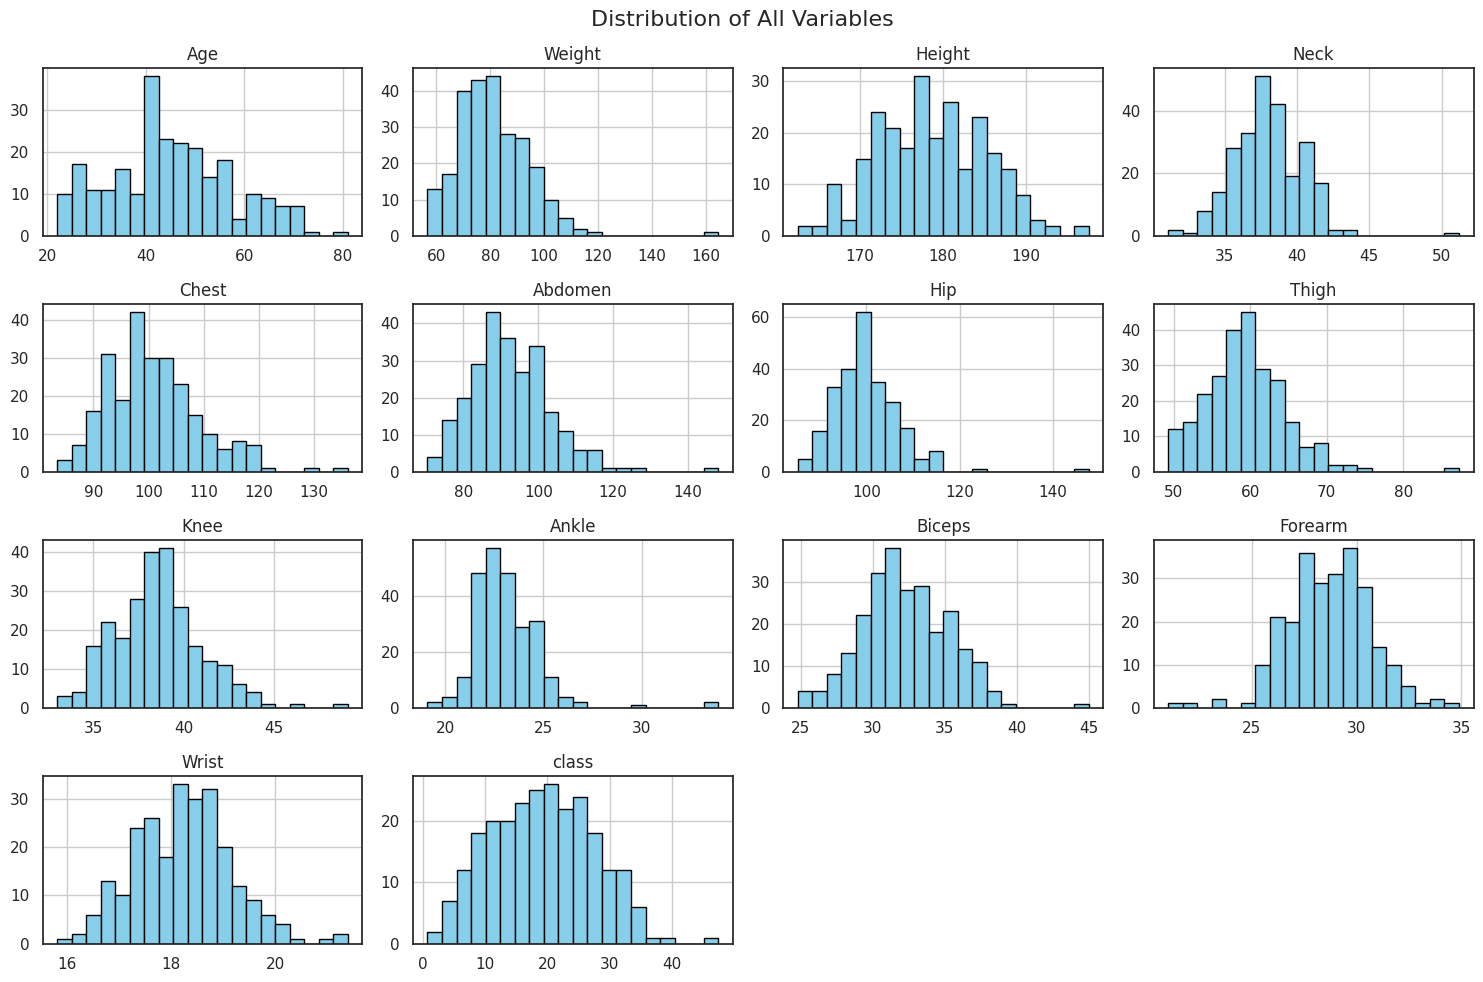

In [10]:
# plotting histograms for all numerical columns
df_final.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of All Variables", fontsize=16)
plt.tight_layout()
plt.show()

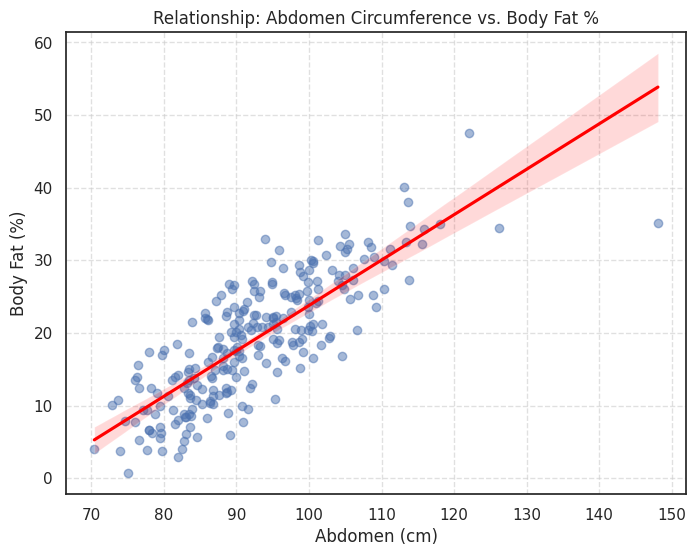

In [12]:
# plotting corelation between abdomen and bodyfat, our correlation matrix showed dependence
plt.figure(figsize=(8, 6))
sns.regplot(data=df_final, x='Abdomen', y='class', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship: Abdomen Circumference vs. Body Fat %")
plt.xlabel("Abdomen (cm)")
plt.ylabel("Body Fat (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

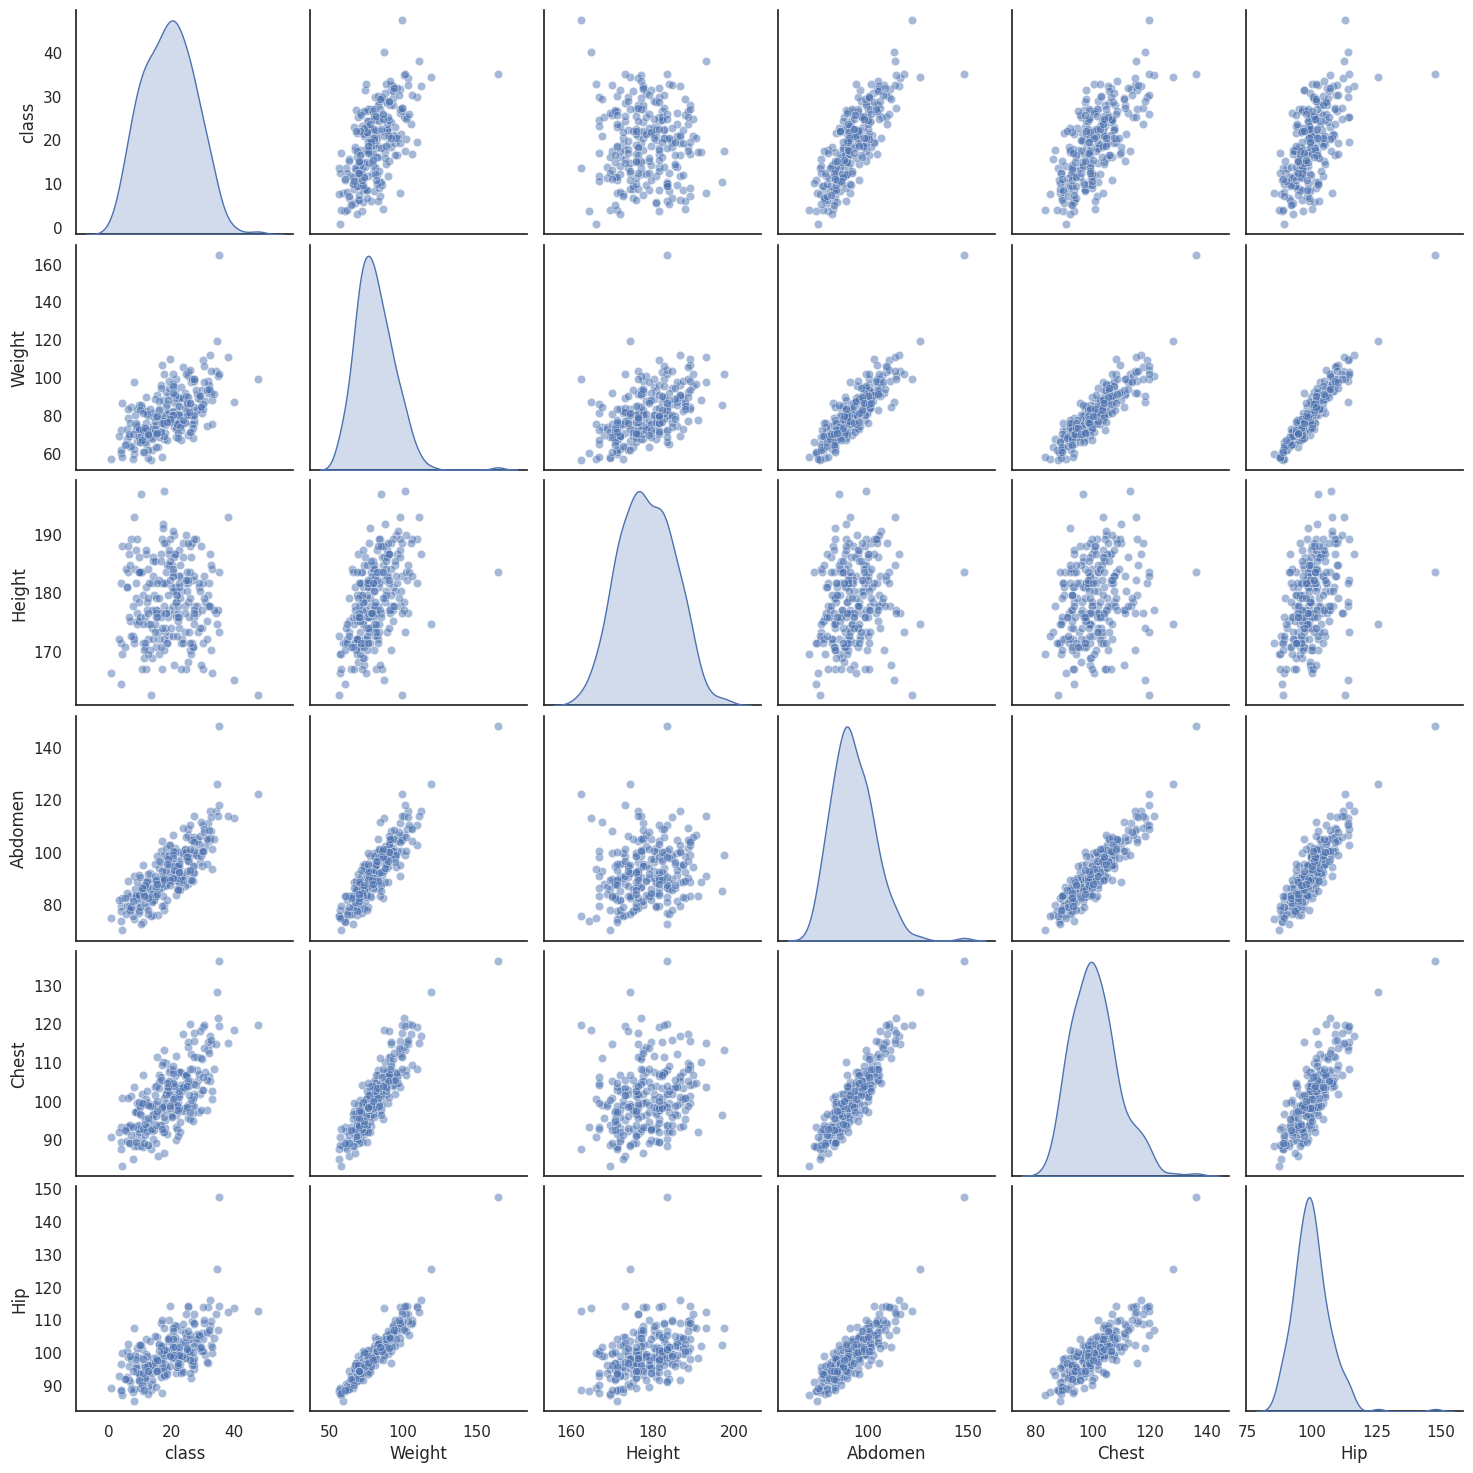

In [13]:
# pariplot for correlations between some others columns

key_columns = ['class', 'Weight', 'Height', 'Abdomen', 'Chest', 'Hip']
sns.pairplot(df_final[key_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

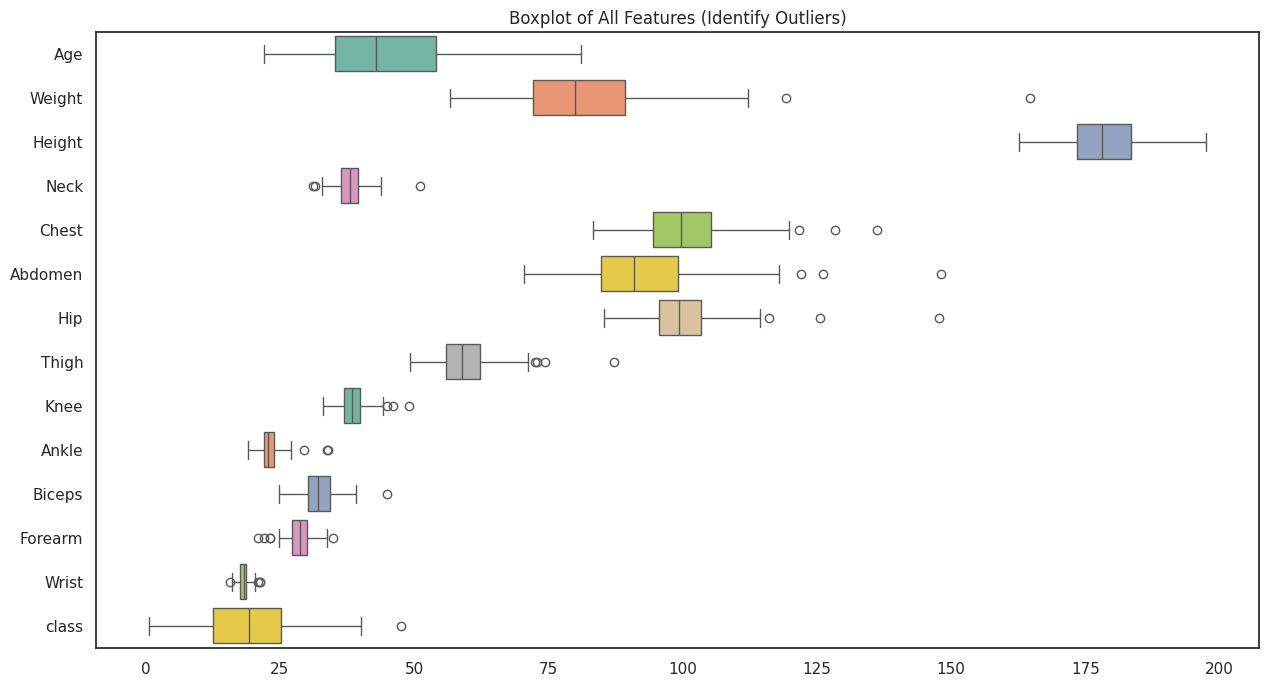

In [14]:
#boxplot for searching outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_final, orient="h", palette="Set2")
plt.title("Boxplot of All Features (Identify Outliers)")
plt.show()

In [15]:
# z-score for outliers
from scipy import stats

# calculating Z-scores for the whole dataframe
z_scores = np.abs(stats.zscore(df_final.select_dtypes(include=[np.number])))

# finding rows where any column has a Z-score > 3
outliers = np.where(z_scores > 3)

# showing the results
outlier_rows = df_final.iloc[outliers[0]]
print(f"Number of extreme outliers found: {len(outlier_rows)}")
print(outlier_rows)

Number of extreme outliers found: 21
     Age      Weight   Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
30    32   82.553744  187.325  38.7  100.5     88.7   99.8   57.5  38.7   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
38    46  164.721935  183.515  51.2  136.2    148.1  147.7   87.3  49.1   
40    45  119.181298  174.625  43.2  128.3    126.2  125.6   72